In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.tree import export_graphviz
import os

In [2]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

In [3]:
featurelist = ['none', 'high', 'higher', 'grad',
                'Median income (dollars)', 'Public Yes/No', 'Charter Yes/No']
inputfile = 'data/merged/allschools.csv'

In [4]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

In [5]:
df = pd.read_csv(inputfile, dtype={'Median income (dollars)': int})

df['ratio'] = df['Adm'] / df['App']
df.loc[df['ratio'] > df['ratio'].mean(), 'class'] = 1
df = df.fillna(0)

In [6]:
X_school = df[featurelist]
y_school = df['class']

In [7]:
df['class'].sum()

717.0

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_school, y_school, random_state = 3)

Accuracy of DT classifier on training set: 0.67
Accuracy of DT classifier on test set: 0.62


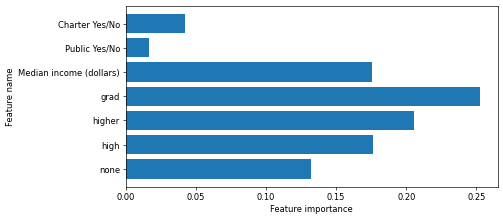

Feature importances: [0.13179301 0.17594639 0.2056269  0.25260668 0.1754905  0.01636115
 0.04217538]


In [9]:
clf = RandomForestClassifier(max_depth=4, random_state=0).fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

plt.figure(figsize=(8,4), dpi=60)

# import features (call the function above)
plot_feature_importances(clf, featurelist)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

In [10]:
train = []
test = []
for d in range(1, 10):
    clf = RandomForestClassifier(max_depth=d, random_state=0).fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    train.append(train_score)
    test.append(test_score)

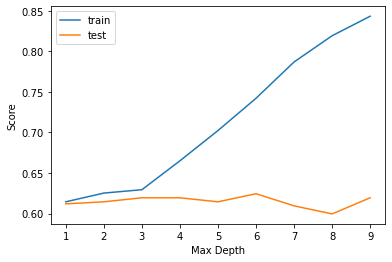

In [11]:
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9], train, label='train')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9], test, label='test')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.legend()

Accuracy of DT classifier on training set: 0.69
Accuracy of DT classifier on test set: 0.63


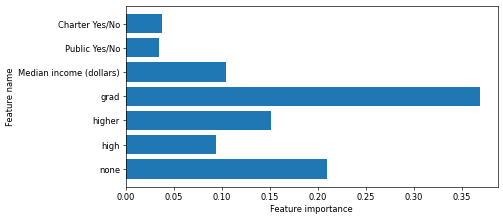

Feature importances: [0.20921087 0.0938617  0.15156131 0.36881335 0.10380388 0.03466439
 0.0380845 ]


In [12]:
clf2 = DecisionTreeClassifier(criterion='gini', max_depth=5).fit(X_train, y_train)

print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

plt.figure(figsize=(8,4), dpi=60)

plot_feature_importances(clf2, featurelist)

plt.show()

print('Feature importances: {}'.format(clf2.feature_importances_))

In [13]:
from sklearn.model_selection import KFold # import k-fold validation
from sklearn.metrics import classification_report

k = 3

kf = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 

In [14]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=40)

In [15]:
c0_avg_precision = 0
c1_avg_precision = 0
X = X_school.to_numpy()
y = y_school.to_numpy()

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    target_names = ['under', 'over']
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    # this is an example to access a measure of each class
    c0_avg_precision += result_metrics_dict['under']['precision']
    c1_avg_precision += result_metrics_dict['over']['precision']
    
print('class 0: ', c0_avg_precision/k)
print('class 1: ', c1_avg_precision/k)

class 0:  0.6049109583544073
class 1:  0.5801529370872437


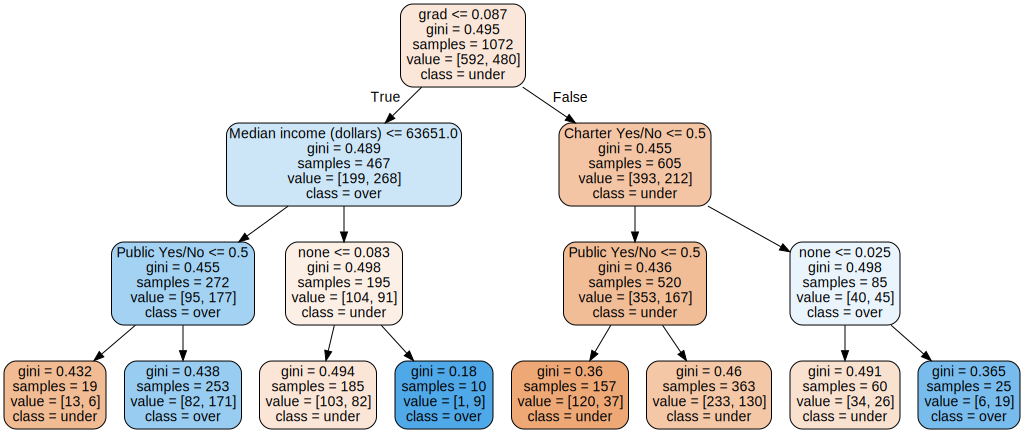

In [16]:
export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "tree.dot"),
        feature_names=featurelist,
        class_names=['under', 'over'],
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "tree.dot"))

In [17]:
tree_clf = RandomForestClassifier(max_depth=4, random_state=0)

c0_avg_precision = 0
c1_avg_precision = 0
f1 = 0
X = X_school.to_numpy()
y = y_school.to_numpy()

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    target_names = ['under', 'over']
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    # this is an example to access a measure of each class
    c0_avg_precision += result_metrics_dict['under']['precision']
    c1_avg_precision += result_metrics_dict['over']['precision']
    f1 += result_metrics_dict['macro avg']['f1-score']
    
print('class 0: ', c0_avg_precision/k)
print('class 1: ', c1_avg_precision/k)
print('f1: ', f1/k)

class 0:  0.6239778582259589
class 1:  0.5804790003670062
f1:  0.5908136082754808


In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb_clf = GaussianNB()

c0_avg_precision = 0
c1_avg_precision = 0
X = X_school.to_numpy()
y = y_school.to_numpy()
f1 = 0

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    nb_clf.fit(X_train, y_train)
    y_pred = nb_clf.predict(X_test)
    
    # Print classification report
    target_names = ['under', 'over']
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    # this is an example to access a measure of each class
    c0_avg_precision += result_metrics_dict['under']['precision']
    c1_avg_precision += result_metrics_dict['over']['precision']
    f1 += result_metrics_dict['macro avg']['f1-score']
    
print('class 0: ', c0_avg_precision/k)
print('class 1: ', c1_avg_precision/k)
print('f1: ', f1/k)

class 0:  0.6152227982809725
class 1:  0.5896804345080207
f1:  0.5768443312249617


In [20]:
from sklearn import svm

In [21]:
svm_clf = svm.SVC()

c0_avg_precision = 0
c1_avg_precision = 0
X = X_school.to_numpy()
y = y_school.to_numpy()

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    
    # Print classification report
    target_names = ['over', 'under']
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    # this is an example to access a measure of each class
    c0_avg_precision += result_metrics_dict['over']['precision']
    c1_avg_precision += result_metrics_dict['under']['precision']
    
print('class 0: ', c0_avg_precision/k)
print('class 1: ', c1_avg_precision/k)

class 0:  0.6057880940452317
class 1:  0.5804760973517


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
LR_clf = LogisticRegression()

c0_avg_precision = 0
c1_avg_precision = 0
X = X_school.to_numpy()
y = y_school.to_numpy()
threshold = 0.45

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    LR_clf.fit(X_train, y_train)
    y_pred = np.where(LR_clf.predict_proba(X_test)[:, 1] > threshold, 1, 0)
    
    # Print classification report
    target_names = ['over', 'under']
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    # this is an example to access a measure of each class
    c0_avg_precision += result_metrics_dict['over']['precision']
    c1_avg_precision += result_metrics_dict['under']['precision']
    
print('class 0: ', c0_avg_precision/k)
print('class 1: ', c1_avg_precision/k)

class 0:  0.595820574477663
class 1:  0.5755567184138614


In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn_clf = KNeighborsClassifier(n_neighbors=4)

c0_avg_precision = 0
c1_avg_precision = 0
X = X_school.to_numpy()
y = y_school.to_numpy()

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    
    # Print classification report
    target_names = ['over', 'under']
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    # this is an example to access a measure of each class
    c0_avg_precision += result_metrics_dict['over']['precision']
    c1_avg_precision += result_metrics_dict['under']['precision']
    
print('class 0: ', c0_avg_precision/k)
print('class 1: ', c1_avg_precision/k)

class 0:  0.5748814938902611
class 1:  0.5100417119615005


In [26]:
(len(df) - df['class'].sum())/len(df)

0.5541044776119403